In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/MyDrive/Fundamentos_ML_Curso/Bases/'

### Importando bibliotecas

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [8]:
base = pd.read_csv(f'{file_path}/modelagem_rh.csv')

In [12]:
base.shape

(14999, 10)

### Leitura da base e analise de atributos

In [14]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Analisando o atributo "Saiu"

In [15]:
base.saiu.value_counts() #Total de colaboradores por opção (Saiu, não saiu)

,count
saiu,
0,11428
1,3571


([<matplotlib.axis.XTick at 0x7f3598525690>,
 [Text(0, 0, 'Não saiu'), Text(1, 0, 'Saiu')])

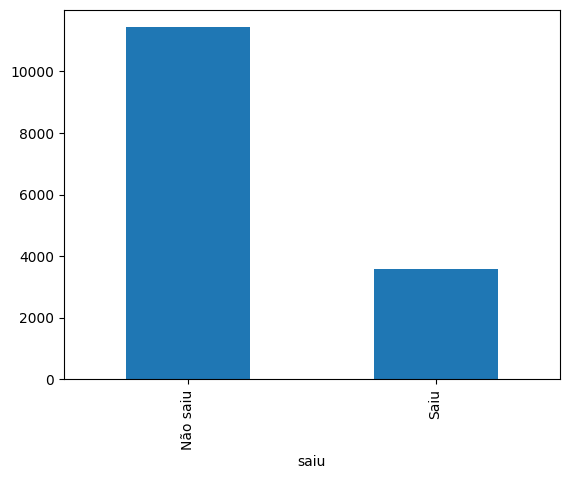

In [22]:
base.saiu.value_counts().plot(kind='bar')
plt.xticks((0,1),['Não saiu', 'Saiu']) #Alterando os rotulos do gráfico

In [16]:
base.saiu.value_counts()/len(base)*100 #Percentual de colaboradores por opção. Atributo 'saiu'

,count
saiu,
0,76.191746
1,23.808254


### Analisando se existe algum departamento com mais desligamento de colaboradores


In [23]:
base.departamento	.value_counts() #Verificando total de colaboradores por departamento e quantidade de departamento

,count
departamento,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [24]:
pd.crosstab(base.departamento, base.saiu)

saiu,0,1
departamento,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [25]:
valores = pd.crosstab(base.departamento, base.saiu)

In [26]:
soma = valores.sum(axis=1)
soma

,0
departamento,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


In [27]:
valores.divide(soma, axis=0)*100 #Proporção entre as opções de desligamento por departamento

saiu,0,1
departamento,,
IT,77.750611,22.249389
RandD,84.625159,15.374841
accounting,73.402868,26.597132
hr,70.906631,29.093369
management,85.555556,14.444444
marketing,76.340326,23.659674
product_mng,78.048780,21.951220
sales,75.507246,24.492754
support,75.100942,24.899058


### Analisando se o atributo "Salario" influencia ou direciona algo nesse desligamento

In [28]:
base.salario.value_counts() #Verificando as opções de salário e total de colaborador

,count
salario,
low,7316
medium,6446
high,1237


In [30]:
pd.crosstab(base.salario, base.saiu) #Analisando quais perfis ou opção de salario teve mais desligamento

saiu,0,1
salario,,
high,1155,82
low,5144,2172
medium,5129,1317


In [34]:
valores_salario = pd.crosstab(base.salario, base.saiu)
soma_salario = valores_salario.sum(axis=1)
soma_salario
valores_salario.divide(soma_salario, axis=0)*100 #Proporção entre salario e saida

saiu,0,1
salario,,
high,93.371059,6.628941
low,70.311646,29.688354
medium,79.568725,20.431275


<Axes: xlabel='salario'>

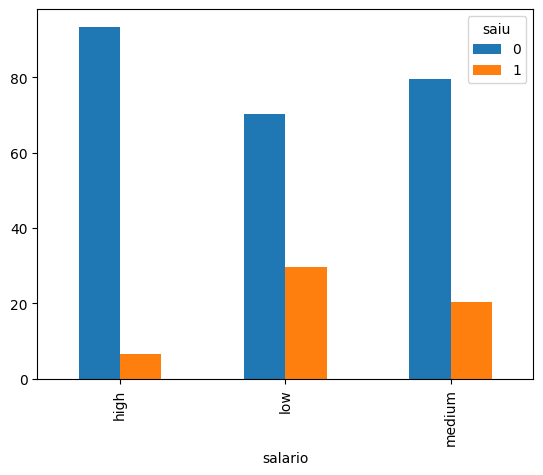

In [35]:
porc_salario = valores_salario.divide(soma_salario, axis=0)*100
porc_salario.plot(kind='bar') #Visualizando a porcentagem de desligamentos com relação ao salário

<Axes: xlabel='salario'>

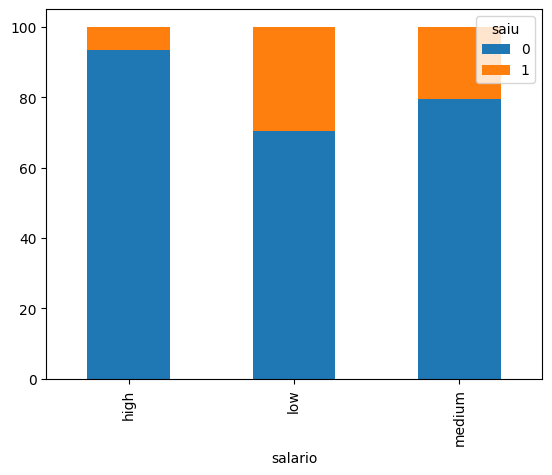

In [40]:
porc_salario.plot(kind='bar', stacked=True)

## Pré-Processamento
Identificando possíveis inconsistencias na base e realizando os tratamentos

In [41]:
base.info() #Visão geral sobre meus atributos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nivel_satisfacao    14978 non-null  float64
 1   ult_avaliacao       14999 non-null  float64
 2   num_projetos        14999 non-null  int64  
 3   media_horas_mes     14999 non-null  int64  
 4   tempo_empresa       14999 non-null  int64  
 5   aci_trabalho        14999 non-null  int64  
 6   saiu                14999 non-null  int64  
 7   promocao_ult_5anos  14999 non-null  int64  
 8   departamento        14999 non-null  object 
 9   salario             14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [43]:
base.isnull().sum() #Faz a contagem dos valores nulos por variavel

,0
nivel_satisfacao,21
ult_avaliacao,0
num_projetos,0
media_horas_mes,0
tempo_empresa,0
aci_trabalho,0
saiu,0
promocao_ult_5anos,0
departamento,0
salario,0


In [45]:
#Tratando os valores nulos
#Utilizei a média dos valores dos outros colaboradores sobre esse atributo

base.nivel_satisfacao.isnull() #Seleciono todos as linhas do atributo nivel de satisfação

,nivel_satisfacao
0,False
1,False
2,False
3,False
4,False
...,...
14994,False
14995,False
14996,False
14997,False


In [46]:
base.loc[base.nivel_satisfacao.isnull(),'nivel_satisfacao'] = base.nivel_satisfacao.mean() #Tratando os campos nulo - adicionando a média dos valores

In [47]:
#Prova real se existe um valor nulo ou não..
base.isnull().sum()

,0
nivel_satisfacao,0
ult_avaliacao,0
num_projetos,0
media_horas_mes,0
tempo_empresa,0
aci_trabalho,0
saiu,0
promocao_ult_5anos,0
departamento,0
salario,0


In [49]:
#Tratando os atributos categoricos ou Strings o caso de departamento, salario
#opções foi criar colunas binarias para essas informações para ajudar no processamento.

base = pd.get_dummies(base, drop_first=True)

In [50]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


#Normalização dos dados

In [51]:
base.max()


,0
nivel_satisfacao,1.0
ult_avaliacao,1.0
num_projetos,7
media_horas_mes,310
tempo_empresa,10
aci_trabalho,1
saiu,1
promocao_ult_5anos,1
departamento_RandD,True
departamento_accounting,True


In [54]:
pd.DataFrame([base.max(), base.min()], index=['max','min'])

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
max,1.00,1.00,7,310,10,1,1,1,True,True,True,True,True,True,True,True,True,True,True
min,0.09,0.36,2,96,2,0,0,0,False,False,False,False,False,False,False,False,False,False,False


In [55]:
pd.DataFrame([base.max(), base.min()], index=['max','min']).T

,max,min
nivel_satisfacao,1.0,0.09
ult_avaliacao,1.0,0.36
num_projetos,7,2
media_horas_mes,310,96
tempo_empresa,10,2
aci_trabalho,1,0
saiu,1,0
promocao_ult_5anos,1,0
departamento_RandD,True,False
departamento_accounting,True,False


In [59]:
#Normalizar num_projetos	7	2 - Chamando a from sklearn import preprocessing
#Criei uma base temporaria para receber o dataframe

x = base.values
x

array([[0.38, 0.53, 2, ..., False, True, False],
       [0.8, 0.86, 5, ..., False, False, True],
       [0.11, 0.88, 7, ..., False, False, True],
       ...,
       [0.37, 0.53, 2, ..., False, True, False],
       [0.11, 0.96, 6, ..., False, True, False],
       [0.37, 0.52, 2, ..., False, True, False]], dtype=object)

In [60]:
minmax = preprocessing.MinMaxScaler()

In [62]:
x_scaled = minmax.fit_transform(x) # Vendo a amplitude e ja devolve tranformado
x_scaled

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.25      , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [65]:
#Remontando minha base de dados

base = pd.DataFrame(x_scaled, columns=base.columns)

In [66]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [67]:
pd.DataFrame([base.max(), base.min()], index=['max','min']).T

,max,min
nivel_satisfacao,1.0,0.0
ult_avaliacao,1.0,0.0
num_projetos,1.0,0.0
media_horas_mes,1.0,0.0
tempo_empresa,1.0,0.0
aci_trabalho,1.0,0.0
saiu,1.0,0.0
promocao_ult_5anos,1.0,0.0
departamento_RandD,1.0,0.0
departamento_accounting,1.0,0.0


## Modelo

In [72]:
#Separando entrada e saída do modelo
cols = list(base.columns)
cols

['nivel_satisfacao',
 'ult_avaliacao',
 'num_projetos',
 'media_horas_mes',
 'tempo_empresa',
 'aci_trabalho',
 'saiu',
 'promocao_ult_5anos',
 'departamento_RandD',
 'departamento_accounting',
 'departamento_hr',
 'departamento_management',
 'departamento_marketing',
 'departamento_product_mng',
 'departamento_sales',
 'departamento_support',
 'departamento_technical',
 'salario_low',
 'salario_medium']

In [73]:
#Removendo meu atributo de saida = Resposata do modelo
cols.remove('saiu')
cols

['nivel_satisfacao',
 'ult_avaliacao',
 'num_projetos',
 'media_horas_mes',
 'tempo_empresa',
 'aci_trabalho',
 'promocao_ult_5anos',
 'departamento_RandD',
 'departamento_accounting',
 'departamento_hr',
 'departamento_management',
 'departamento_marketing',
 'departamento_product_mng',
 'departamento_sales',
 'departamento_support',
 'departamento_technical',
 'salario_low',
 'salario_medium']

In [74]:
#Entrada do modelo
x = base[cols]

In [75]:
#Saida do modelo
y = base['saiu']

### Importando os algoritmos para a modelagem KNN E árvore de decisão

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [78]:
knn = KNeighborsClassifier(n_neighbors=3)
tree = DecisionTreeClassifier()

### Seprarando o conjunto de Treinamento
80% Treinamento
20% Validação/ Teste


In [79]:
from sklearn.model_selection import train_test_split #Faz a distribuição aleatoriamente

In [80]:
x_train, x_teste, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [81]:
x_train

(       nivel_satisfacao  ult_avaliacao  num_projetos  media_horas_mes  \
 7116           0.747253       0.234375           0.4         0.214953   
 11439          0.747253       0.984375           0.4         0.766355   
 12579          0.329670       0.296875           0.0         0.294393   
 4857           0.428571       0.828125           0.2         0.771028   
 5985           0.582418       0.937500           0.6         0.724299   
 ...                 ...            ...           ...              ...   
 12024          0.340659       0.265625           0.0         0.289720   
 9336           0.967033       0.468750           0.4         0.570093   
 11609          0.868132       0.343750           0.2         0.228972   
 7474           0.626374       0.421875           0.2         0.327103   
 1509           0.384615       0.250000           0.0         0.149533   
 
        tempo_empresa  aci_trabalho  promocao_ult_5anos  departamento_RandD  \
 7116           0.250          

In [82]:
print(x_train.shape, x_teste.shape)

(11999, 18) (3000, 18)


In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [84]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [86]:
predicted = knn.predict(x_teste)

In [88]:
accuracy_score(predicted, y_test)

0.955

In [89]:
#Poporção, será que ele ta puxando para alguma lado?

confusion_matrix(predicted, y_test)

array([[2208,   41],
       [  94,  657]])

In [91]:
#Árvore de decisão
tree.fit(x_train, y_train)


DecisionTreeClassifier()

In [92]:
accuracy_score(tree.predict(x_teste), y_test)

0.9803333333333333

In [94]:
confusion_matrix(tree.predict(x_teste),y_test)

array([[2263,   20],
       [  39,  678]])

### Validação cruzada

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
scores = cross_val_score(knn, x,y, cv=5, scoring='accuracy')

In [97]:
scores

array([0.96666667, 0.931     , 0.93433333, 0.95733333, 0.95165055])

In [98]:
scores.mean()

0.9481967767033457

In [99]:
scores.std() #Desvio padrão

0.013597545694866528

In [100]:
#Árvore de decisão

scores_tree = cross_val_score(tree, x, y, cv=5, scoring ='accuracy')

In [101]:
scores_tree

array([0.979     , 0.965     , 0.96833333, 0.99066667, 0.97665889])

In [102]:
scores_tree.mean()

0.9759317772590863

In [105]:
scores_tree.std() #árvore de decisão ganhou..

0.008992216059763119

In [106]:
#Importância dos atributos
tree.feature_importances_

array([4.93864182e-01, 1.41317103e-01, 1.03826236e-01, 9.89775384e-02,
       1.40135637e-01, 1.46536230e-03, 3.51271910e-04, 1.98695074e-03,
       1.39379444e-03, 6.51649265e-04, 7.92982127e-04, 4.16150804e-04,
       1.09695564e-03, 1.38508191e-03, 3.26961432e-03, 2.56642460e-03,
       4.02470212e-03, 2.47836414e-03])

In [107]:
pd.DataFrame(tree.feature_importances_, index=x.columns)

,0
nivel_satisfacao,0.493864
ult_avaliacao,0.141317
num_projetos,0.103826
media_horas_mes,0.098978
tempo_empresa,0.140136
aci_trabalho,0.001465
promocao_ult_5anos,0.000351
departamento_RandD,0.001987
departamento_accounting,0.001394
departamento_hr,0.000652


<Axes: >

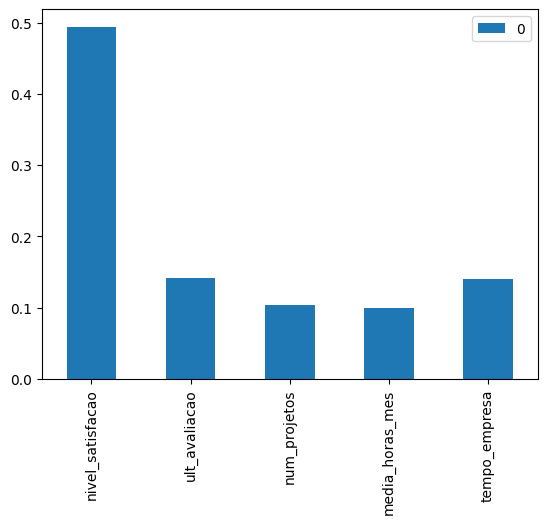

In [110]:
pd.DataFrame(tree.feature_importances_, index=x.columns)[:5].plot(kind='bar') #Verificando as cinco primeiras linhas

Deply do modelo

In [111]:
import pickle

In [112]:
tree.fit(x,y)

DecisionTreeClassifier()

In [113]:
pickle.dump(tree, open("modelo_rh.pickle", 'wb'))

In [114]:
tree_salva = pickle.load(open("modelo_rh.pickle",'rb'))

In [115]:
tree_salva

DecisionTreeClassifier()

In [119]:
#tree_salva.predict(x_test)